## <font color=dark red> Data Loading </font>

#### <font color=blue> Step 1 - Load EST 1 and EST 2 files. </font>

In [1]:
# Import data

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

columns_of_interest = ['device_number','device_description','site','work_order_number','work_order_priority_description','wo_type_description','problem_reported','lot_year','num_parts_from_storeroom','num_parts_from_po','repair_part_number','repair_part_name','repair_part_stocktype']

<font color = green> Additional Request for Milestone 1 added.</font>

In [2]:
len(columns_of_interest)

13

In [3]:
# Update file path below - 

df1 = pd.read_excel(r'data\EST 1.xlsx')
df2 = pd.read_excel(r'data\EST 2.xlsx')

In [4]:
df1.shape

(64996, 41)

In [5]:
df2.shape

(44586, 35)

In [6]:
df1.columns

Index(['TFA', 'SUBTFA', 'SYSTEMID', 'DEVICE NUMBER', 'DEVICE DESCRIPTION',
       'DEVICE SERIAL NUMER', 'SITE', 'WORK ORDER NUMBER',
       'WORK ORDER DESCRIPTION', 'WORK ORDER PRIORITY DESCRIPTION',
       'WOTYPE_DESCRIPTION', 'FUNCTIONAL LOCATION DRILL DOWN',
       'FUNCTIONAL LOCATION DESCRIPTION', 'PROBLEMREPORTED', 'ACTIONCOMPLETED',
       'TIME TO RETURN (Days.% of 24hrs)', 'LOT YEAR',
       'AFFECTED PART UNIQUE IDENTIFIER', 'AFFECTED PART NUMBER',
       'AFFECTED PART NAME', 'AFFECTED PART SERIAL NUMBER',
       'MAINTENANCE ACTION', 'NUMPARTSFROMSTOREROOM', 'NUMPARTSFROMPO',
       'DATE SENT TO VENDOR', 'DATE RECEIVED FROM VENDOR',
       'REPAIR PART OWNERSHIP', 'REPAIR PART NUMBER', 'REPAIR PART NAME',
       'REPAIR PART SERIAL NUMBER', 'REPAIR PART STOCKTYPE', 'REPAIR CATEGORY',
       'REPAIR PART FARCODE', 'TOTAL WORK ORDER LABOR', 'LONG DESCRIPTION',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40'],
      dt

In [7]:
df2.columns

Index(['TFA', 'SUBTFA', 'SYSTEMID', 'DEVICE NUMBER', 'DEVICE DESCRIPTION',
       'DEVICE SERIAL NUMER', 'SITE', 'WORK ORDER NUMBER',
       'WORK ORDER DESCRIPTION', 'WORK ORDER PRIORITY DESCRIPTION',
       'WOTYPE_DESCRIPTION', 'FUNCTIONAL LOCATION DRILL DOWN',
       'FUNCTIONAL LOCATION DESCRIPTION', 'PROBLEMREPORTED', 'ACTIONCOMPLETED',
       'TIME TO RETURN (Days.% of 24hrs)', 'LOT YEAR',
       'AFFECTED PART UNIQUE IDENTIFIER', 'AFFECTED PART NUMBER',
       'AFFECTED PART NAME', 'AFFECTED PART SERIAL NUMBER',
       'MAINTENANCE ACTION', 'NUMPARTSFROMSTOREROOM', 'NUMPARTSFROMPO',
       'DATE SENT TO VENDOR', 'DATE RECEIVED FROM VENDOR',
       'REPAIR PART OWNERSHIP', 'REPAIR PART NUMBER', 'REPAIR PART NAME',
       'REPAIR PART SERIAL NUMBER', 'REPAIR PART STOCKTYPE', 'REPAIR CATEGORY',
       'REPAIR PART FARCODE', 'TOTAL WORK ORDER LABOR', 'LONG DESCRIPTION'],
      dtype='object')

#### <font color=blue> Step 2 - Rename columns names by replacing whitespace with underscore, coverting to lowercase. </font>

In [8]:
df1.columns = df1.columns.str.strip().str.lower().str.replace(" ","_")
df2.columns = df2.columns.str.strip().str.lower().str.replace(" ","_")

In [9]:
df1.columns

Index(['tfa', 'subtfa', 'systemid', 'device_number', 'device_description',
       'device_serial_numer', 'site', 'work_order_number',
       'work_order_description', 'work_order_priority_description',
       'wotype_description', 'functional_location_drill_down',
       'functional_location_description', 'problemreported', 'actioncompleted',
       'time_to_return_(days.%_of_24hrs)', 'lot_year',
       'affected_part_unique_identifier', 'affected_part_number',
       'affected_part_name', 'affected_part_serial_number',
       'maintenance_action', 'numpartsfromstoreroom', 'numpartsfrompo',
       'date_sent_to_vendor', 'date_received_from_vendor',
       'repair_part_ownership', 'repair_part_number', 'repair_part_name',
       'repair_part_serial_number', 'repair_part_stocktype', 'repair_category',
       'repair_part_farcode', 'total_work_order_labor', 'long_description',
       'unnamed:_35', 'unnamed:_36', 'unnamed:_37', 'unnamed:_38',
       'unnamed:_39', 'unnamed:_40'],
      dt

In [10]:
df1 = df1.rename({'wotype_description':'wo_type_description','problemreported':'problem_reported',\
           'numpartsfromstoreroom':'num_parts_from_storeroom','numpartsfrompo':'num_parts_from_po'},axis='columns',errors="raise")
df2 = df2.rename({'wotype_description':'wo_type_description','problemreported':'problem_reported',\
           'numpartsfromstoreroom':'num_parts_from_storeroom','numpartsfrompo':'num_parts_from_po'},axis='columns',errors="raise")

In [11]:
df1.columns

Index(['tfa', 'subtfa', 'systemid', 'device_number', 'device_description',
       'device_serial_numer', 'site', 'work_order_number',
       'work_order_description', 'work_order_priority_description',
       'wo_type_description', 'functional_location_drill_down',
       'functional_location_description', 'problem_reported',
       'actioncompleted', 'time_to_return_(days.%_of_24hrs)', 'lot_year',
       'affected_part_unique_identifier', 'affected_part_number',
       'affected_part_name', 'affected_part_serial_number',
       'maintenance_action', 'num_parts_from_storeroom', 'num_parts_from_po',
       'date_sent_to_vendor', 'date_received_from_vendor',
       'repair_part_ownership', 'repair_part_number', 'repair_part_name',
       'repair_part_serial_number', 'repair_part_stocktype', 'repair_category',
       'repair_part_farcode', 'total_work_order_labor', 'long_description',
       'unnamed:_35', 'unnamed:_36', 'unnamed:_37', 'unnamed:_38',
       'unnamed:_39', 'unnamed:_40'],


#### <font color=blue> Step 3 - Filter out unwanted columns from dataframes. </font>

In [12]:
df1_new = df1[df1.columns.intersection(columns_of_interest)].copy()
df2_new = df2[df2.columns.intersection(columns_of_interest)].copy()

In [13]:
df1_new.columns

Index(['device_number', 'device_description', 'site', 'work_order_number',
       'work_order_priority_description', 'wo_type_description',
       'problem_reported', 'lot_year', 'num_parts_from_storeroom',
       'num_parts_from_po', 'repair_part_number', 'repair_part_name',
       'repair_part_stocktype'],
      dtype='object')

In [14]:
len(df1_new.columns)

13

In [15]:
df1_new.shape

(64996, 13)

In [16]:
len(df2_new.columns)

13

In [17]:
df2_new.columns

Index(['device_number', 'device_description', 'site', 'work_order_number',
       'work_order_priority_description', 'wo_type_description',
       'problem_reported', 'lot_year', 'num_parts_from_storeroom',
       'num_parts_from_po', 'repair_part_number', 'repair_part_name',
       'repair_part_stocktype'],
      dtype='object')

In [18]:
df2_new.shape

(44586, 13)

#### <font color=blue> Step 4 - Concatenate the two datasets </font>

In [19]:
type(df2_new)

pandas.core.frame.DataFrame

In [20]:
df_main = pd.concat([df1_new,df2_new],axis=0,ignore_index = True)

In [21]:
df_main.shape

(109582, 13)

In [22]:
df_main.head()

,device_number,device_description,site,work_order_number,work_order_priority_description,wo_type_description,problem_reported,lot_year,num_parts_from_storeroom,num_parts_from_po,repair_part_number,repair_part_name,repair_part_stocktype
0,07-129,Engagement Skills Trainer (EST) 2000,"Ft Leonard Wood, MO",6766881,Corrective Maintenance,Corrective COR,2015-04-03 10:40:00,6.0,0.0,0.0,No parts issued to workorder,No parts issued to workorder,No Parts Issued from Inventory
1,07-129,Engagement Skills Trainer (EST) 2000,"Ft Sill, OK",5780918,Corrective Maintenance,Corrective COR,2013-05-30 13:00:00,5.0,0.0,0.0,No parts issued to workorder,No parts issued to workorder,No Parts Issued from Inventory
2,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,6305062,Corrective Maintenance,Corrective COR,2014-05-30 16:48:00,6.0,0.0,0.0,No parts issued to workorder,No parts issued to workorder,No Parts Issued from Inventory
3,07-129,Engagement Skills Trainer (EST) 2000,"Ft Leonard Wood, MO",6425405,Corrective Maintenance,Corrective COR,2014-08-19 13:18:00,6.0,2.0,0.0,93135A076,"SCREW, NYLON MOUNTING, SENSOR BOARD (CUBIC) M1...",CONSUMABLE
4,07-129,Engagement Skills Trainer (EST) 2000,"Ft Leonard Wood, MO",6425405,Corrective Maintenance,Corrective COR,2014-08-19 13:18:00,6.0,2.0,0.0,924013066,"BOARD, SENSOR , M4 / M16 , CUBIC",REPAIRABLE


## <font color=dark red> Data Cleansing </font>

#### <font color=blue> Step 1 - Convert problem_reported column to date column. The column values are already of datetime type.</font>

In [23]:
df_main['problem_reported'], type(df_main['problem_reported'])

(0        2015-04-03 10:40:00
 1        2013-05-30 13:00:00
 2        2014-05-30 16:48:00
 3        2014-08-19 13:18:00
 4        2014-08-19 13:18:00
                  ...        
 109577   2013-08-21 14:39:14
 109578   2014-12-19 13:48:18
 109579   2014-12-19 13:48:18
 109580   2014-12-19 13:48:18
 109581                   NaT
 Name: problem_reported, Length: 109582, dtype: datetime64[ns],
 pandas.core.series.Series)

In [24]:
df_main['problem_reported'] = df_main.problem_reported.dt.date

In [25]:
df_main['problem_reported']

0         2015-04-03
1         2013-05-30
2         2014-05-30
3         2014-08-19
4         2014-08-19
             ...    
109577    2013-08-21
109578    2014-12-19
109579    2014-12-19
109580    2014-12-19
109581           NaT
Name: problem_reported, Length: 109582, dtype: object

In [26]:
# df_main = df_main.rename({'problem_reported':'date'},axis='columns',errors="raise")

In [27]:
df_main['problem_reported']

0         2015-04-03
1         2013-05-30
2         2014-05-30
3         2014-08-19
4         2014-08-19
             ...    
109577    2013-08-21
109578    2014-12-19
109579    2014-12-19
109580    2014-12-19
109581           NaT
Name: problem_reported, Length: 109582, dtype: object

#### <font color=blue> Step 2 - Removing all records that have a description of 'Modification Government' & 'Operational Support' & 'Exercise Support' & 'Log Problem' & 'Operational Support'.</font>
<font color = green> Additional Request for Milestone 1 added.</font>

In [28]:
df_main.wo_type_description.unique()

array(['Corrective COR', 'Modification Government', 'Preventive PM',
       'Operational Support', 'Exercise Support', 'Log Problem', nan],
      dtype=object)

In [29]:
df_main.shape

(109582, 13)

In [30]:
df_main = df_main.drop(df_main.index[df_main['wo_type_description'].str.
                                     contains('Modification Government|Operational Support|Exercise Support|Log Problem|Operational Support', na=False)])

In [31]:
df_main.shape

(108601, 13)

In [32]:
df_main.wo_type_description.unique()

array(['Corrective COR', 'Preventive PM', nan], dtype=object)

#### <font color=blue> Step 3 - Removing all rows that have values of 'Move/Modify/Upgrade' & 'Exercise/Operational Support' in the 'work_order_priority_description' column. </font>

<font color = green> Additional Request for Milestone 1 added.</font>

In [33]:
df_main.work_order_priority_description.unique()

array(['Corrective Maintenance', 'PMCS', 'System - Device Degraded',
       'Bench/Depot Repair', 'System - Device Down',
       'Exercise/Operational Support', 'Move/Modify/Upgrade', nan],
      dtype=object)

In [34]:
df_main.shape

(108601, 13)

In [35]:
df_main = df_main.drop(df_main.index[df_main['work_order_priority_description'].str.contains('Move/Modify/Upgrade|Exercise/Operational Support', na=False)])

In [36]:
df_main.shape

(108301, 13)

In [37]:
df_main.work_order_priority_description.unique()

array(['Corrective Maintenance', 'PMCS', 'System - Device Degraded',
       'Bench/Depot Repair', 'System - Device Down', nan], dtype=object)

#### <font color=blue> Step 4 - Removing all rows that have values of 'No parts issued to workorder'in the 'repair_part_number' column. </font>

In [38]:
df_main.repair_part_number.unique()

array(['No parts issued to workorder', '93135A076', '924013066', ...,
       '1009520', '6975000', '28301'], dtype=object)

In [39]:
df_main = df_main.drop(df_main.index[df_main['repair_part_number'].str.contains('No parts issued to workorder', na=False)])

In [40]:
df_main.shape

(84609, 13)

#### <font color=blue> Before we move onto the next step, lets check for nan values.</font>

In [41]:
df_main.tail()

,device_number,device_description,site,work_order_number,work_order_priority_description,wo_type_description,problem_reported,lot_year,num_parts_from_storeroom,num_parts_from_po,repair_part_number,repair_part_name,repair_part_stocktype
109574,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,6668843,Bench/Depot Repair,Corrective COR,2015-05-01,6.0,8.0,0.0,28301,"SCREW, 6-32X3/8 IN. PHILLIPS FLATHEAD MACHINE,...",CONSUMABLE
109578,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,DR6560719,Bench/Depot Repair,Corrective COR,2014-12-19,6.0,1.0,0.0,KA10F09,"FILTER, COALESCING (FILTER ONLY), JUN-AIR",CONSUMABLE
109579,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,DR6560719,Bench/Depot Repair,Corrective COR,2014-12-19,6.0,1.0,0.0,201112,"CONNECTOR, T-JOINT , GRAINGER",CONSUMABLE
109580,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,DR6560719,Bench/Depot Repair,Corrective COR,2014-12-19,6.0,3.0,0.0,70MDD,"GAUGE , AIR COMPRESSOR, Y-PACK, JUN-AIR",CONSUMABLE
109581,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# for col in df_main:
#     print(df_main[col].name,'=',df_main[col].unique())

df_main.isnull().sum()

device_number                      2
device_description                 2
site                               2
work_order_number                  2
work_order_priority_description    2
wo_type_description                2
problem_reported                   2
lot_year                           2
num_parts_from_storeroom           2
num_parts_from_po                  2
repair_part_number                 2
repair_part_name                   2
repair_part_stocktype              2
dtype: int64

In [43]:
# lets remove the two rows with nan values.
df_main = df_main.dropna(axis=0)

In [44]:
df_main.shape

(84607, 13)

## <font color=dark red> Reporting </font>

#### <font color=blue> Generating a view that displays the number of remaining records.</font>

In [45]:
total_records = df_main.shape[0]

In [46]:
total_records

84607

In [47]:
wo_typedesc_df = df_main['wo_type_description'].value_counts().to_frame()

In [48]:
wo_typedesc_df

,wo_type_description
Corrective COR,84417
Preventive PM,190


In [49]:
wo_prioritydesc_df = df_main['work_order_priority_description'].value_counts().to_frame()

In [50]:
wo_prioritydesc_df

,work_order_priority_description
Corrective Maintenance,46412
Bench/Depot Repair,36679
System - Device Down,863
System - Device Degraded,396
PMCS,257


In [51]:
# Set label size for plots
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
sns.set_context("poster")
# plt.rcParams.update({'font.size': 10})

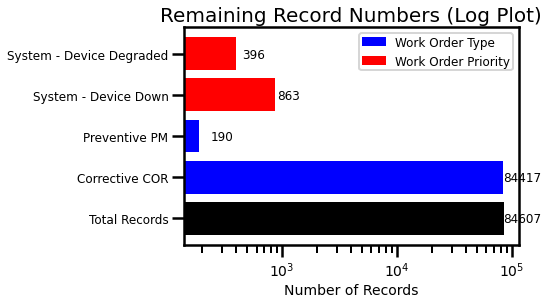

In [52]:
plt.barh('Total Records',total_records, color = 'k',log=True)
plt.barh('Corrective COR',wo_typedesc_df.loc['Corrective COR'][0],color = 'b',label = 'Work Order Type')
plt.barh('Preventive PM',wo_typedesc_df.loc['Preventive PM'][0],color = 'b')
plt.barh('System - Device Down',wo_prioritydesc_df.loc['System - Device Down'][0],color = 'r',label = 'Work Order Priority')
plt.barh('System - Device Degraded',wo_prioritydesc_df.loc['System - Device Degraded'][0],color = 'r')

values = [total_records,wo_typedesc_df.loc['Corrective COR'][0],wo_typedesc_df.loc['Preventive PM'][0],wo_prioritydesc_df.loc['System - Device Down'][0],wo_prioritydesc_df.loc['System - Device Degraded'][0]]
i = 1
j = 50
for i in range(len(values)):
    plt.annotate(values[i], (values[i] + j, -0.1 + i), fontsize=12)

plt.title('Remaining Record Numbers (Log Plot)',fontsize=20)
plt.xlabel('Number of Records',fontsize=14)
plt.legend(borderpad=0.2,prop={'size':12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
# plt.xlim(0,10^6)
# plt.figsize=(20, 20)
# plt.savefig('Remaining_Records.png',dpi=120, facecolor='w',orientation='potrait', bbox_inches="tight")
plt.show()

## <font color=dark red> Exploratory Data Analysis (EDA) </font>

#### <font color=blue> Step 1 - Generating a view that displays the minimum and maximum Problem Reported Dates.</font>

In [53]:
# Earliest and latest problem reported dates for all the records

df_main['problem_reported'].agg(['min','max'])

min    2009-03-07
max    2015-11-12
Name: problem_reported, dtype: object

In [54]:
# The least number of problems reported for any day was 1 , and the maximum number of problems were reported
# on March 3, 2014. A total of 311 problems reported.

df_main['problem_reported'].value_counts(ascending=True)

2011-09-12      1
2013-10-12      1
2013-01-26      1
2012-03-28      1
2013-08-31      1
             ... 
2014-03-04    269
2014-10-06    280
2013-03-15    297
2014-03-31    301
2014-12-03    311
Name: problem_reported, Length: 1052, dtype: int64

In [55]:
#Earliest and latest problem reported dates for records in 'wo_type_description' group.
df_main.groupby('wo_type_description').problem_reported.agg(['min','max'])

,min,max
wo_type_description,,
Corrective COR,2009-03-07,2015-11-12
Preventive PM,2012-05-16,2015-04-27


In [56]:
#Earliest and latest problem reported dates for records in 'work_order_priority_description' group.
df_main.groupby('work_order_priority_description').problem_reported.agg(['min','max'])

,min,max
work_order_priority_description,,
Bench/Depot Repair,2010-02-16,2015-07-13
Corrective Maintenance,2009-03-07,2015-11-12
PMCS,2012-05-16,2015-04-27
System - Device Degraded,2011-09-12,2015-04-30
System - Device Down,2012-05-01,2015-04-30


#### <font color=blue> Step 2 - Generating a view that displays the total parts used by adding 'num_parts_from_storeroom' + 'num_parts_from_po'.</font>

In [57]:
df_main['total_parts_used'] = df_main['num_parts_from_storeroom'] + df_main['num_parts_from_po']

In [58]:
#Additional column added with the name 'total_parts_used'
df_main.shape

(84607, 14)

In [59]:
df_main['repair_part_stocktype'].unique()

array(['CONSUMABLE', 'REPAIRABLE', 'No Parts Issued from Inventory'],
      dtype=object)

In [60]:
df_main.groupby(['wo_type_description']).total_parts_used.sum().to_frame()

,total_parts_used
wo_type_description,
Corrective COR,277942.0
Preventive PM,697.0


<font color = green> Additional Request for Milestone 1 added.</font>

In [61]:
df_main.groupby(['wo_type_description','repair_part_stocktype']).total_parts_used.sum().to_frame()

total_parts_used
wo_type_description repair_part_stocktype                           
Corrective COR      CONSUMABLE                              257620.0
                    No Parts Issued from Inventory            1358.0
                    REPAIRABLE                               18964.0
Preventive PM       CONSUMABLE                                 687.0
                    REPAIRABLE                                  10.0

In [62]:
df_main.groupby('work_order_priority_description').total_parts_used.sum().to_frame()

,total_parts_used
work_order_priority_description,
Bench/Depot Repair,163057.0
Corrective Maintenance,112150.0
PMCS,889.0
System - Device Degraded,709.0
System - Device Down,1834.0


<font color = green> Additional Request for Milestone 1 added.</font>

In [63]:
df_main.groupby(['work_order_priority_description','repair_part_stocktype']).total_parts_used.sum().to_frame()

total_parts_used
work_order_priority_description repair_part_stocktype                           
Bench/Depot Repair              CONSUMABLE                              155093.0
                                No Parts Issued from Inventory            1266.0
                                REPAIRABLE                                6698.0
Corrective Maintenance          CONSUMABLE                              100496.0
                                No Parts Issued from Inventory              86.0
                                REPAIRABLE                               11568.0
PMCS                            CONSUMABLE                                 854.0
                                No Parts Issued from Inventory               4.0
                                REPAIRABLE                                  31.0
System - Device Degraded        CONSUMABLE                                 512.0
                                No Parts Issued from Inventory               2.0
                                REPAIRABLE                                 195.0
System - Device Down            CONSUMABLE                                1352.0
                                REPAIRABLE                                 482.0

#### <font color=blue> Step 3 - Generating a view that displays the count of different parts used by distinct 'repair_part_number'.</font>

In [64]:
pd.set_option('display.max_rows',10)

In [65]:
df_main.groupby('wo_type_description').repair_part_number.value_counts().to_frame()

repair_part_number
wo_type_description repair_part_number                    
Corrective COR      924013066                         6447
                    1021502                           3536
                    91253A104                         3061
                    921342660                         1857
                    93135A076                         1667
...                                                    ...
Preventive PM       GMA-15A                              1
                    KQ2H16-03S                           1
                    KQ2H16-UO3                           1
                    LRA911-CR-B/250N                     1
                    M23053/5-108-0                       1

[2575 rows x 1 columns]

In [66]:
df_main.groupby('work_order_priority_description').repair_part_number.value_counts().to_frame()

repair_part_number
work_order_priority_description repair_part_number                    
Bench/Depot Repair              924013066                         2409
                                91253A104                         1343
                                95647A111                         1040
                                1021502                            891
                                93135A076                          717
...                                                                ...
System - Device Down            MS3367-4-9                           1
                                PS2-MOUSE                            1
                                R724075                              1
                                R9010344                             1
                                R9023011                             1

[3594 rows x 1 columns]

## <font color=dark red> Data Preparation  </font>

#### <font color=blue> Step 1 - Creating 4 new columns for Demand Interval. Abbreviate to DI-COR, DI-PM, DI-NMC, DI-PMC</font>

In [67]:
df_main

,device_number,device_description,site,work_order_number,work_order_priority_description,wo_type_description,problem_reported,lot_year,num_parts_from_storeroom,num_parts_from_po,repair_part_number,repair_part_name,repair_part_stocktype,total_parts_used
3,07-129,Engagement Skills Trainer (EST) 2000,"Ft Leonard Wood, MO",6425405,Corrective Maintenance,Corrective COR,2014-08-19,6.0,2.0,0.0,93135A076,"SCREW, NYLON MOUNTING, SENSOR BOARD (CUBIC) M1...",CONSUMABLE,2.0
4,07-129,Engagement Skills Trainer (EST) 2000,"Ft Leonard Wood, MO",6425405,Corrective Maintenance,Corrective COR,2014-08-19,6.0,2.0,0.0,924013066,"BOARD, SENSOR , M4 / M16 , CUBIC",REPAIRABLE,2.0
5,07-129,Engagement Skills Trainer (EST) 2000,"Ft Leonard Wood, MO",6425405,Corrective Maintenance,Corrective COR,2014-08-19,6.0,2.0,0.0,94812A111,"NUT, NYLON, HEX,.086-56UNC-2B (0400256HN), MCM...",CONSUMABLE,2.0
6,07-129,Engagement Skills Trainer (EST) 2000,"Ft Leonard Wood, MO",6425405,Corrective Maintenance,Corrective COR,2014-08-19,6.0,1.0,0.0,6002ST,"TAG, SHOE / REPAIR (102 TAGS)",CONSUMABLE,1.0
7,07-129,Engagement Skills Trainer (EST) 2000,"Ft Dix, NJ",6480767,Corrective Maintenance,Corrective COR,2014-09-19,6.0,1.0,0.0,921341194,"SELECTOR ASSY, CUBIC",CONSUMABLE,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109573,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,6668843,Bench/Depot Repair,Corrective COR,2015-05-01,6.0,6.0,0.0,APSC6R3ETD152MJB5S,"CAPACITOR, ALUMINUM ORGANIC POLYMER, 1500 UF 6...",CONSUMABLE,6.0
109574,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,6668843,Bench/Depot Repair,Corrective COR,2015-05-01,6.0,8.0,0.0,28301,"SCREW, 6-32X3/8 IN. PHILLIPS FLATHEAD MACHINE,...",CONSUMABLE,8.0
109578,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,DR6560719,Bench/Depot Repair,Corrective COR,2014-12-19,6.0,1.0,0.0,KA10F09,"FILTER, COALESCING (FILTER ONLY), JUN-AIR",CONSUMABLE,1.0
109579,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,DR6560719,Bench/Depot Repair,Corrective COR,2014-12-19,6.0,1.0,0.0,201112,"CONNECTOR, T-JOINT , GRAINGER",CONSUMABLE,1.0


In [68]:
# # Lets create separate dataframes for COR, PM, NMC, PMC for convenience and subsequent plotting of Demand Intervals. 

df_cor = df_main[df_main.wo_type_description.str.contains('Corrective COR')].copy()
df_pm = df_main[df_main.wo_type_description.str.contains('Preventive PM')].copy()
df_nmc = df_main[df_main.work_order_priority_description.str.contains('System - Device Down')].copy()
df_pmc = df_main[df_main.work_order_priority_description.str.contains('System - Device Degraded')].copy()

#### <font color=blue> Step 2 - Sort by problem_reported.</font>

In [69]:
df_cor

,device_number,device_description,site,work_order_number,work_order_priority_description,wo_type_description,problem_reported,lot_year,num_parts_from_storeroom,num_parts_from_po,repair_part_number,repair_part_name,repair_part_stocktype,total_parts_used
3,07-129,Engagement Skills Trainer (EST) 2000,"Ft Leonard Wood, MO",6425405,Corrective Maintenance,Corrective COR,2014-08-19,6.0,2.0,0.0,93135A076,"SCREW, NYLON MOUNTING, SENSOR BOARD (CUBIC) M1...",CONSUMABLE,2.0
4,07-129,Engagement Skills Trainer (EST) 2000,"Ft Leonard Wood, MO",6425405,Corrective Maintenance,Corrective COR,2014-08-19,6.0,2.0,0.0,924013066,"BOARD, SENSOR , M4 / M16 , CUBIC",REPAIRABLE,2.0
5,07-129,Engagement Skills Trainer (EST) 2000,"Ft Leonard Wood, MO",6425405,Corrective Maintenance,Corrective COR,2014-08-19,6.0,2.0,0.0,94812A111,"NUT, NYLON, HEX,.086-56UNC-2B (0400256HN), MCM...",CONSUMABLE,2.0
6,07-129,Engagement Skills Trainer (EST) 2000,"Ft Leonard Wood, MO",6425405,Corrective Maintenance,Corrective COR,2014-08-19,6.0,1.0,0.0,6002ST,"TAG, SHOE / REPAIR (102 TAGS)",CONSUMABLE,1.0
7,07-129,Engagement Skills Trainer (EST) 2000,"Ft Dix, NJ",6480767,Corrective Maintenance,Corrective COR,2014-09-19,6.0,1.0,0.0,921341194,"SELECTOR ASSY, CUBIC",CONSUMABLE,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109573,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,6668843,Bench/Depot Repair,Corrective COR,2015-05-01,6.0,6.0,0.0,APSC6R3ETD152MJB5S,"CAPACITOR, ALUMINUM ORGANIC POLYMER, 1500 UF 6...",CONSUMABLE,6.0
109574,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,6668843,Bench/Depot Repair,Corrective COR,2015-05-01,6.0,8.0,0.0,28301,"SCREW, 6-32X3/8 IN. PHILLIPS FLATHEAD MACHINE,...",CONSUMABLE,8.0
109578,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,DR6560719,Bench/Depot Repair,Corrective COR,2014-12-19,6.0,1.0,0.0,KA10F09,"FILTER, COALESCING (FILTER ONLY), JUN-AIR",CONSUMABLE,1.0
109579,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,DR6560719,Bench/Depot Repair,Corrective COR,2014-12-19,6.0,1.0,0.0,201112,"CONNECTOR, T-JOINT , GRAINGER",CONSUMABLE,1.0


In [70]:
df_cor = df_cor.sort_values('problem_reported').copy()
df_pm = df_pm.sort_values('problem_reported').copy()
df_nmc = df_nmc.sort_values('problem_reported').copy()
df_pmc = df_pmc.sort_values('problem_reported').copy()

## <font color=dark red>Exploratory Data Analysis</font>

#### <font color="blue">Step 1 - Calculate time interval between problem_reported dates.</font>

In [71]:
# I have named the demand interval columns using lowercase and underscore. 
# Let me know if you want to change it to what you suggested (DI-COR etc.)

In [72]:
df_cor['demand_interval_cor'] = df_cor['problem_reported'].diff() / np.timedelta64(7, 'D')
df_pm['demand_interval_pm'] = df_pm['problem_reported'].diff() / np.timedelta64(7, 'D')
df_nmc['demand_interval_nmc'] = df_nmc['problem_reported'].diff() / np.timedelta64(7, 'D')
df_pmc['demand_interval_pmc'] = df_pmc['problem_reported'].diff() / np.timedelta64(7, 'D')

In [73]:
df_cor['demand_interval_cor'].unique(), df_cor.shape

(array([        nan, 49.42857143,  0.        , 74.85714286,  7.        ,
         2.        ,  0.85714286,  7.71428571,  5.42857143,  0.14285714,
         0.42857143,  0.28571429,  1.        ,  2.57142857,  0.57142857,
         0.71428571,  1.57142857, 17.42857143]),
 (84417, 15))

In [74]:
df_pm['demand_interval_pm'].unique(), df_pm.shape

(array([        nan,  1.28571429,  0.        ,  0.71428571,  1.71428571,
         2.57142857,  0.85714286,  0.14285714,  0.28571429,  2.42857143,
         2.14285714,  1.        ,  1.14285714,  0.42857143,  0.57142857,
         2.        ,  6.71428571,  4.85714286,  2.71428571,  3.57142857,
        12.57142857,  3.42857143,  4.57142857,  1.42857143,  5.85714286,
         4.14285714,  4.71428571, 13.28571429,  3.71428571,  8.        ,
         1.85714286,  6.57142857,  5.        ,  2.28571429]),
 (190, 15))

In [75]:
df_nmc['demand_interval_nmc'].unique(), df_nmc.shape

(array([       nan, 0.        , 0.14285714, 0.71428571, 0.28571429,
        0.85714286, 0.57142857, 2.14285714, 1.        , 1.28571429,
        1.14285714, 0.42857143, 1.71428571, 2.        , 1.42857143,
        2.71428571]),
 (863, 15))

In [76]:
df_pmc['demand_interval_pmc'].unique(), df_pmc.shape

(array([        nan, 28.42857143,  4.        ,  0.14285714,  0.        ,
         0.57142857,  1.28571429,  0.71428571,  1.14285714,  2.71428571,
         0.28571429,  0.42857143,  0.85714286,  2.        ,  1.        ,
         1.71428571,  2.14285714,  1.42857143,  2.85714286,  2.42857143,
         1.85714286,  3.        ,  2.28571429]),
 (396, 15))

#### <font color="blue">Step 2 - Scatter Plot of Interval and Size (Raw Numbers no averages for this plot) </font>

In [77]:
sns.set_context("poster")


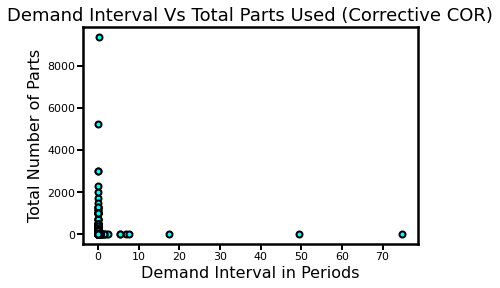

In [78]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(df_cor['demand_interval_cor'],df_cor['total_parts_used'], c='aqua',marker='.',edgecolor='k');
ax.set_title('Demand Interval Vs Total Parts Used (Corrective COR)',size=18);
ax.set_ylabel('Total Number of Parts', fontsize = 16);
ax.set_xlabel('Demand Interval in Periods', fontsize = 16);
ax.tick_params(direction='out', length=6, width=2, labelsize=11, pad=1.5)
# ax.set_xscale('log')
# ax.axis(xmin=0,xmax=0.0001)

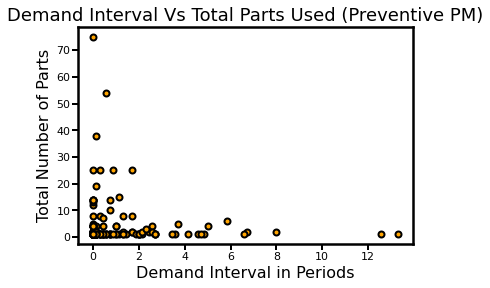

In [79]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(df_pm['demand_interval_pm'],df_pm['total_parts_used'], c='orange',marker='.',edgecolor='k')
ax.set_title('Demand Interval Vs Total Parts Used (Preventive PM)',size=18);
ax.set_ylabel('Total Number of Parts', fontsize = 16);
ax.set_xlabel('Demand Interval in Periods', fontsize = 16);
ax.tick_params(direction='out', length=6, width=2, labelsize=11, pad=1.5);

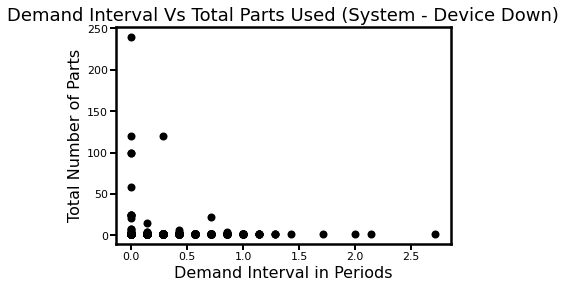

In [80]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(df_nmc['demand_interval_nmc'],df_nmc['total_parts_used'], c='k',marker='.',edgecolor='k')
ax.set_title('Demand Interval Vs Total Parts Used (System - Device Down)',size=18);
ax.set_ylabel('Total Number of Parts', fontsize = 16);
ax.set_xlabel('Demand Interval in Periods', fontsize = 16);
ax.tick_params(direction='out', length=6, width=2, labelsize=11, pad=1.5);

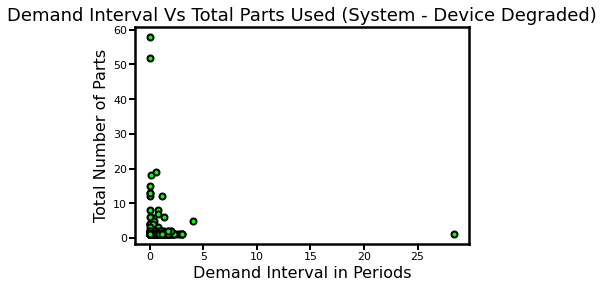

In [81]:
fig = plt.figure()
ax = plt.gca()
# ax.set_xscale('log')
ax.scatter(df_pmc['demand_interval_pmc'],df_pmc['total_parts_used'], c='lime',marker='.',edgecolor='k')
ax.set_title('Demand Interval Vs Total Parts Used (System - Device Degraded)',size=18);
ax.set_ylabel('Total Number of Parts', fontsize = 16);
ax.set_xlabel('Demand Interval in Periods', fontsize = 16);
ax.tick_params(direction='out', length=6, width=2, labelsize=11, pad=1.5);

#### <font color="blue">Step 3 - Looking for seasonality. </font>

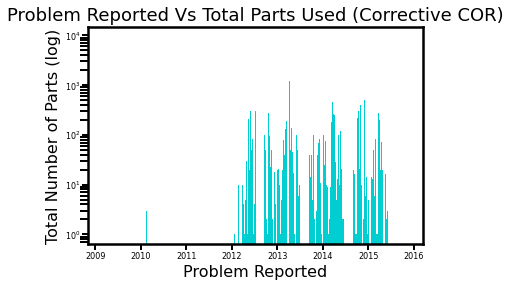

In [82]:
fig = plt.figure()
ax = plt.gca()
ax.bar(df_cor['problem_reported'],df_cor['total_parts_used'],color='darkturquoise');
ax.set_title('Problem Reported Vs Total Parts Used (Corrective COR)',size=18);
ax.set_ylabel('Total Number of Parts (log)', fontsize = 16);
ax.set_xlabel('Problem Reported', fontsize = 16);
ax.tick_params(direction='out', length=6, width=2, labelsize=8, pad=1.5)
ax.set_yscale('log');
# plt.scatter(df_cor['problem_reported'],df_cor['demand_interval_cor'])

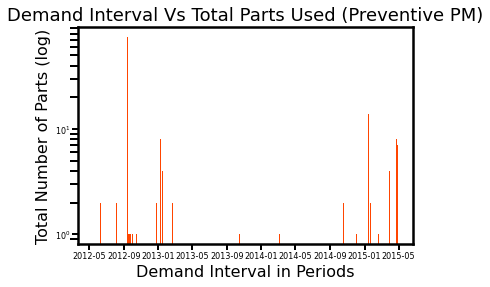

In [83]:
fig = plt.figure()
ax = plt.gca()
ax.bar(df_pm['problem_reported'],df_pm['total_parts_used'], color='orangered');
ax.set_title('Demand Interval Vs Total Parts Used (Preventive PM)',size=18);
ax.set_ylabel('Total Number of Parts (log)', fontsize = 16);
ax.set_xlabel('Demand Interval in Periods', fontsize = 16);
ax.tick_params(direction='out', length=6, width=2, labelsize=8, pad=1.5)
ax.set_yscale('log');

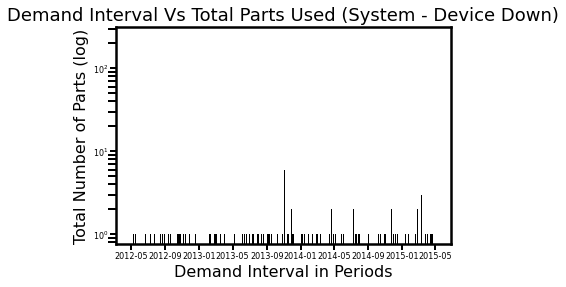

In [84]:
fig = plt.figure()
ax = plt.gca()
ax.bar(df_nmc['problem_reported'],df_nmc['total_parts_used'], color='k');
ax.set_title('Demand Interval Vs Total Parts Used (System - Device Down)',size=18);
ax.set_ylabel('Total Number of Parts (log)', fontsize = 16);
ax.set_xlabel('Demand Interval in Periods', fontsize = 16);
ax.tick_params(direction='out', length=6, width=2, labelsize=8, pad=1.5)
ax.set_yscale('log');

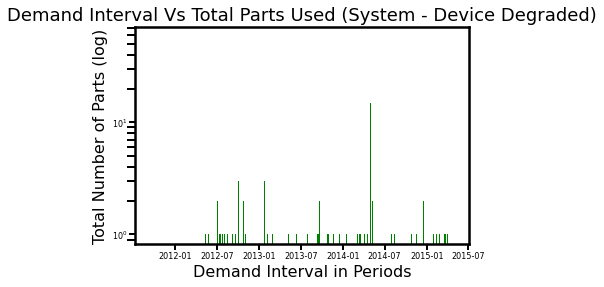

In [85]:
fig = plt.figure()
ax = plt.gca()
ax.bar(df_pmc['problem_reported'],df_pmc['total_parts_used'], color='green');
ax.set_title('Demand Interval Vs Total Parts Used (System - Device Degraded)',size=18);
ax.set_ylabel('Total Number of Parts (log)', fontsize = 16);
ax.set_xlabel('Demand Interval in Periods', fontsize = 16);
ax.tick_params(direction='out', length=6, width=2, labelsize=8, pad=1.5)
ax.set_yscale('log');

#### <font color="blue">Step 4 - Scatter Plot of ADI vs CV2 by group </font>